<a href="https://colab.research.google.com/github/M123shashank/TSF_task-1_Student-percentage-score-prediction/blob/main/Student_percentage_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name : Shashank Mishra**

# **Project title : "Student percentage score prediction using Supervised ML"**

## **Github Link :https://github.com/M123shashank/TSF_task-1_Student-percentage-score-prediction.git**
        

## **Problem Statement**

Develop a predictive model to estimate the percentage of a student based on the number of study hours, with the aim of providing accurate and reliable predictions to support academic planning and decision-making.

## **Linear Regression with Python Scikit Learn**



In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


### **Simple Linear Regression**


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## **Importing Libraries & Dataset**

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Reading data from google drive
df = pd.read_csv('/content/drive/MyDrive/TSF tasks/Prediction using Supervised ML/Student score.csv')
print("Data imported successfully")

Data imported successfully


## **Data inspection**

In [ ]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.shape

(25, 2)

- The dataset is very small. It will be very easy to work on it.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- There are no null values present in the dataset. Hence, we dont need the step "treatment of missing values".

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- The above result clearly shows no presence of the outliers. Hence, we will simply visualize the data and apply linear regression model.

## **Data Visualization**

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

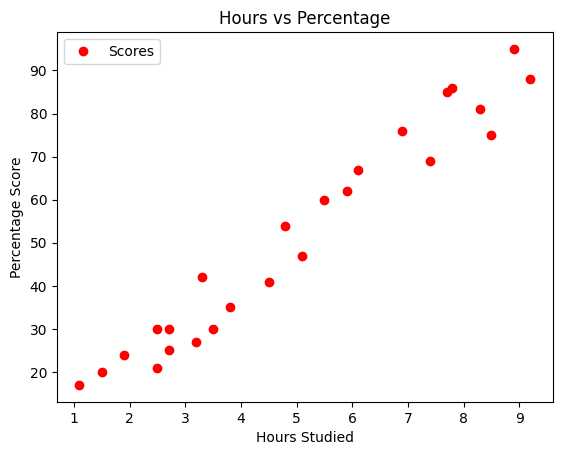

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o', color = 'red')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into independent (input) and dependent variable (output).

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
# Examining the attributes
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### **Training and testing split**

The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


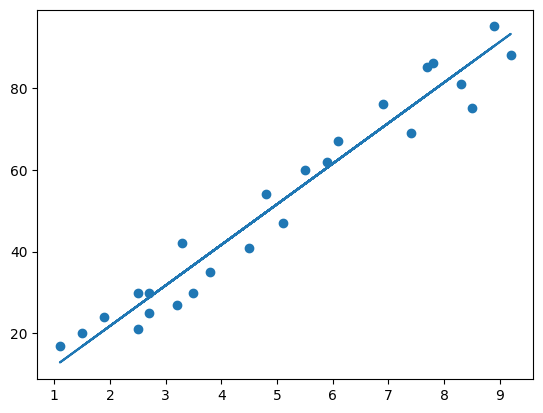

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_new

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# let us test with our own data
hours = [[9.25]]  # Reshape the input data as a 2D array
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))  # Access the value from the reshaped array
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


- It is a quite high MSE value which can have great impact on the results. But since, we are bound to use Linear Regression as per the project requirements, hence, we will stop here with this result.

## **Conclusion**

✨The predicted score if a student studies for 9.25 hrs/ day will be ' 93.692'.✨

## **Summary**

- We have imported the required libraries and started the task.
- We inquired the data.
- We did not found any missing values, outliers and hence the data cleaning part was skipped.
- After visualizing the data, we fiund linear relationship and hence we chose to apply linear regression, which was already suggested in the project beforehand.
- We have trained and tested the data.
- We applied the linear data. During the application part, we got an error related to shape of array. We fixed that error and proceeded further.
- Finally we extrated the results and conlusions.

💐*I would like to express our sincere gratitude to all the viewers for their time and attention throughout this project. Thank you for your support and engagement.* 💐